# Raspberry Pi Mouse sensor monitor

[raspimouse_http_controller](https://github.com/Tiryoh/raspimouse_http_controller)と組み合わせて使用するラズパイマウスのセンサ値連続受信用Jupyter Notebookです。

注がある場合を除き、本ページに掲載されているコードは[MIT](https://tiryoh.mit-license.org/)ライセンスに、文章は[CC BY 4.0](https://creativecommons.org/licenses/by/4.0/deed.ja)ライセンスに基づいて公開します。

実際に動いている様子は<a href="https://youtu.be/sBr1ngoACnU" target="_blank">YouTubeの動画</a>で確認できます。

## Requirements

Python 3を必要とします。

# step1
Pythonのモジュールをインポートします。
Jupyter Notebookでの描画に必要なモジュールと、ラズパイマウスとの通信に必要なモジュールと分かれています。

In [1]:
# 数値計算及び描画に必要なモジュール
import numpy as np
import math
from  matplotlib import pyplot as plt
from  matplotlib import patches as patches

# 通信用
import urllib.request
import time
import argparse
import json
import threading

# JupyterNotebook用モジュール
from IPython import display

# デバッグ用
from pprint import pprint

# step2

受信用のクラス(Receiver)を作成します。ラズパイマウスとTCP通信を行います。

In [2]:
class Receiver(object):
    def __init__(self, ip, port):
        print("init")
        self.url = "http://{}:{}".format(ip, port)
        print ("connecting to " + self.url)

    def get_sensor_val(self):
        start = time.time()
        request = urllib.request.Request(self.url)
        response = urllib.request.urlopen(request)
        sensor_dict = json.loads(response.read().decode('utf-8'))
        return sensor_dict

# step3

ラズパイマウスと接続を確立します。
引数にはIPアドレスと使用するTCPポートを指定します。

In [3]:
# r = Receiver("192.168.64.3", 5000)
r = Receiver("192.168.22.137", 5000)

init
connecting to http://192.168.22.137:5000


# step4

試しにラズパイマウスからセンサの値を受信し、`print` してみます。

In [4]:
history = []
hoge = r.get_sensor_val()
history.append(hoge)
print(hoge)
print(history)

{'switch': {'2': 0, '1': 0, '0': 0}, 'lightsensor': {'2': 47, '1': 260, '0': 15, '3': 30}}
[{'switch': {'2': 0, '1': 0, '0': 0}, 'lightsensor': {'2': 47, '1': 260, '0': 15, '3': 30}}]


# step5

ラズパイマウスからセンサの値を連続受信し、`pprint` してみます。
`pprint` を用いることで `print` される内容が整形されます。

In [5]:
for i in range(10):
    hoge = r.get_sensor_val()
    history.append(hoge)
    time.sleep(0.1)

pprint(history)

[{'lightsensor': {'0': 15, '1': 260, '2': 47, '3': 30},
  'switch': {'0': 0, '1': 0, '2': 0}},
 {'lightsensor': {'0': 9, '1': 272, '2': 52, '3': 31},
  'switch': {'0': 0, '1': 0, '2': 0}},
 {'lightsensor': {'0': 12, '1': 251, '2': 45, '3': 32},
  'switch': {'0': 0, '1': 0, '2': 0}},
 {'lightsensor': {'0': 16, '1': 255, '2': 44, '3': 28},
  'switch': {'0': 0, '1': 0, '2': 0}},
 {'lightsensor': {'0': 8, '1': 271, '2': 47, '3': 29},
  'switch': {'0': 0, '1': 0, '2': 0}},
 {'lightsensor': {'0': 18, '1': 253, '2': 50, '3': 28},
  'switch': {'0': 0, '1': 0, '2': 0}},
 {'lightsensor': {'0': 17, '1': 262, '2': 46, '3': 33},
  'switch': {'0': 0, '1': 0, '2': 0}},
 {'lightsensor': {'0': 12, '1': 253, '2': 50, '3': 30},
  'switch': {'0': 0, '1': 0, '2': 0}},
 {'lightsensor': {'0': 15, '1': 274, '2': 45, '3': 30},
  'switch': {'0': 0, '1': 0, '2': 0}},
 {'lightsensor': {'0': 12, '1': 252, '2': 50, '3': 34},
  'switch': {'0': 0, '1': 0, '2': 0}},
 {'lightsensor': {'0': 16, '1': 258, '2': 45, '3': 2

# step6

ラズパイマウスからセンサの値を連続受信し、受信するたびにグラフに描画します。  

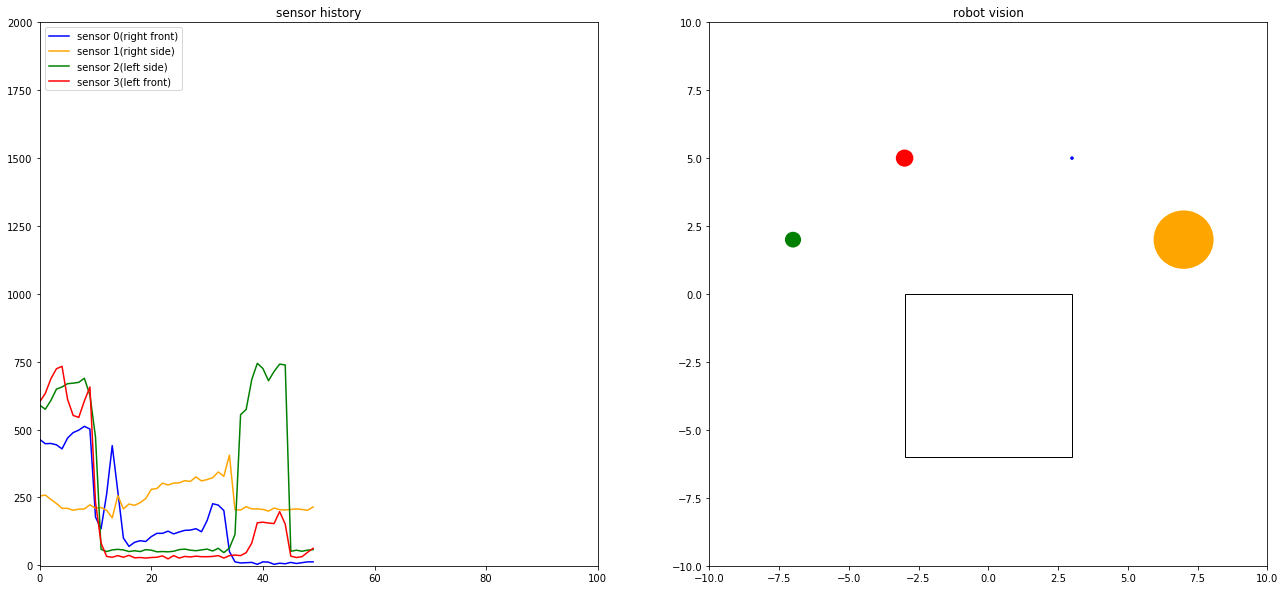

done.


In [6]:
history = []

for i in range(30):
    
    if len(history) > 99:
        history = []
    
    # ラズパイマウスから情報取得
    for i in range(5):
        hoge = r.get_sensor_val()
        history.append(hoge)
        time.sleep(0.1)
    
    # タイトル付き新規ウィンドウ、座標軸を用意
    fig = plt.figure(figsize=(22, 10))
    
    graph = plt.subplot(1,2,1)
    graph.set_title("sensor history")
    graph.set_xlim(0,100)
    graph.set_ylim(-1.5,2000)
    
    view = plt.subplot(1,2,2)
    view.set_title("robot vision")
    view.set_xlim(-10,10)
    view.set_ylim(-10,10)


    x_arr = np.array([])
    y1_arr = np.array([])
    y2_arr = np.array([])
    y3_arr = np.array([])
    y0_arr = np.array([])

    for i in range(len(history)):
        x_arr = np.append(x_arr, i)
        y0_arr = np.append(y0_arr, history[i]["lightsensor"]["0"])
        y1_arr = np.append(y1_arr, history[i]["lightsensor"]["1"])
        y2_arr = np.append(y2_arr, history[i]["lightsensor"]["2"])
        y3_arr = np.append(y3_arr, history[i]["lightsensor"]["3"])

    graph.plot(x_arr, y0_arr, label = "sensor 0(right front)", color = 'blue')
    graph.plot(x_arr, y1_arr, label = "sensor 1(right side)", color = 'orange')
    graph.plot(x_arr, y2_arr, label = "sensor 2(left side)", color = 'green')
    graph.plot(x_arr, y3_arr, label = "sensor 3(left front)", color = 'red')
    
    rf = patches.Circle(xy=(3, 5), radius=(history[len(history)-1]["lightsensor"]["0"])/200, fc='blue')
    rs = patches.Circle(xy=(7, 2), radius=(history[len(history)-1]["lightsensor"]["1"])/200, fc='orange')
    lf = patches.Circle(xy=(-3, 5), radius=(history[len(history)-1]["lightsensor"]["3"])/200, fc='red')
    ls = patches.Circle(xy=(-7, 2), radius=(history[len(history)-1]["lightsensor"]["2"])/200, fc='green')
    robot = patches.Rectangle(xy=(-3, -6), width=6, height=6, ec='#000000', fill=False)
    view.add_patch(rf)
    view.add_patch(rs)
    view.add_patch(lf)
    view.add_patch(ls)
    view.add_patch(robot)

    # 左上に凡例を追加
    graph.legend(loc='upper left')

    # 現在の状態を確認
    display.clear_output(wait=True)
    display.display(plt.gcf())
    #time.sleep(0.05)
    
print("done.")